In [1]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [2]:
folder1=r"C:\VIT TY\CV\Course Project\PosExer"
folder2=r"C:\VIT TY\CV\Course Project\PosCook"
folder3=r"C:\VIT TY\CV\Course Project\NegImg"

In [3]:
i=0
for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(200,200)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #initialise sift descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    norm = Normalizer()
    normalized = norm.fit_transform(descriptors)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(normalized)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('C:\VIT TY\CV\Course Project\PosExer.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (117, 128)
descriptor shape  1  :  (71, 128)
descriptor shape  2  :  (679, 128)
descriptor shape  3  :  (118, 128)
descriptor shape  4  :  (76, 128)
descriptor shape  5  :  (118, 128)
descriptor shape  6  :  (199, 128)
descriptor shape  7  :  (94, 128)
descriptor shape  8  :  (104, 128)
descriptor shape  9  :  (131, 128)
descriptor shape  10  :  (95, 128)
descriptor shape  11  :  (145, 128)
descriptor shape  12  :  (112, 128)
descriptor shape  13  :  (71, 128)
descriptor shape  14  :  (71, 128)
descriptor shape  15  :  (105, 128)
descriptor shape  16  :  (143, 128)
descriptor shape  17  :  (215, 128)
descriptor shape  18  :  (165, 128)
descriptor shape  19  :  (127, 128)
descriptor shape  20  :  (193, 128)
descriptor shape  21  :  (90, 128)
descriptor shape  22  :  (85, 128)
descriptor shape  23  :  (143, 128)
descriptor shape  24  :  (69, 128)
descriptor shape  25  :  (103, 128)
descriptor shape  26  :  (211, 128)
descriptor shape  27  :  (208, 128)
descriptor 

In [4]:
data1 = pd.read_csv(r'C:\VIT TY\CV\Course Project\PosExer.csv',header=None,dtype='float64')
#MemoryError: Unable to allocate 166. MiB for an array with shape (128, 169606) and data type float64,
#Double-precision floating-point format

data1=data1.astype(np.float64) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.017576,0.232398,0.123034,0.003906,0.001953,0.000000,0.000000,0.000000,0.042964,0.056635,...,0.011718,0.064446,0.000000,0.000000,0.000000,0.003906,0.001953,0.000000,0.000000,0.001953
1,0.000000,0.000000,0.000000,0.001952,0.029283,0.091755,0.013666,0.000000,0.285026,0.001952,...,0.000000,0.273312,0.009761,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007809
2,0.000000,0.003904,0.029280,0.130784,0.056608,0.000000,0.000000,0.000000,0.072224,0.124928,...,0.003904,0.025376,0.236192,0.236192,0.000000,0.000000,0.000000,0.000000,0.000000,0.015616
3,0.003908,0.001954,0.000000,0.000000,0.005862,0.021496,0.087937,0.025404,0.082075,0.033221,...,0.000000,0.236454,0.109433,0.005862,0.000000,0.000000,0.000000,0.000000,0.000000,0.017587
4,0.023411,0.226310,0.144370,0.000000,0.000000,0.000000,0.000000,0.000000,0.241917,0.304348,...,0.001951,0.093645,0.000000,0.000000,0.000000,0.000000,0.001951,0.001951,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399653,0.078014,0.054610,0.003901,0.000000,0.000000,0.001950,0.009752,0.115071,0.224290,0.113120,...,0.099468,0.064361,0.005851,0.000000,0.000000,0.000000,0.000000,0.021454,0.076064,0.040957
399654,0.162306,0.228792,0.093864,0.001955,0.000000,0.000000,0.000000,0.001955,0.228792,0.291368,...,0.000000,0.070398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001955
399655,0.101764,0.287678,0.068495,0.000000,0.000000,0.000000,0.000000,0.000000,0.144818,0.287678,...,0.001957,0.074366,0.001957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
399656,0.000000,0.000000,0.003904,0.011711,0.000000,0.000000,0.000000,0.000000,0.000000,0.005856,...,0.000000,0.001952,0.037085,0.255690,0.035133,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
i=0
for filename in os.listdir(folder2):
    
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(200, 200)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #initialise sift descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    norm = Normalizer()
    normalized = norm.fit_transform(descriptors)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(normalized)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv(r'C:\VIT TY\CV\Course Project\PosCook.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (481, 128)
descriptor shape  1  :  (312, 128)
descriptor shape  2  :  (416, 128)
descriptor shape  3  :  (303, 128)
descriptor shape  4  :  (305, 128)
descriptor shape  5  :  (169, 128)
descriptor shape  6  :  (410, 128)
descriptor shape  7  :  (492, 128)
descriptor shape  8  :  (178, 128)
descriptor shape  9  :  (444, 128)
descriptor shape  10  :  (248, 128)
descriptor shape  11  :  (508, 128)
descriptor shape  12  :  (119, 128)
descriptor shape  13  :  (269, 128)
descriptor shape  14  :  (164, 128)
descriptor shape  15  :  (370, 128)
descriptor shape  16  :  (188, 128)
descriptor shape  17  :  (214, 128)
descriptor shape  18  :  (268, 128)
descriptor shape  19  :  (129, 128)
descriptor shape  20  :  (82, 128)
descriptor shape  21  :  (200, 128)
descriptor shape  22  :  (148, 128)
descriptor shape  23  :  (92, 128)
descriptor shape  24  :  (434, 128)
descriptor shape  25  :  (97, 128)
descriptor shape  26  :  (197, 128)
descriptor shape  27  :  (132, 128)
descr

In [6]:
data2= pd.read_csv(r'C:\VIT TY\CV\Course Project\PosCook.csv',header=None,dtype='float64')
data2=data2.astype(np.float64)
data2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.027387,0.027387,0.001956,0.000000,0.000000,0.000000,0.000000,0.001956,0.011737,0.017606,...,0.000000,0.197580,0.275829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.179974
1,0.000000,0.000000,0.273359,0.218687,0.000000,0.000000,0.000000,0.000000,0.001953,0.015621,...,0.000000,0.000000,0.000000,0.000000,0.001953,0.085913,0.039051,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021485,0.001953,...,0.000000,0.009766,0.097661,0.019532,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.097780,0.103647,0.000000,0.000000,0.000000,0.000000,0.000000,0.095824,0.310940,...,0.000000,0.019556,0.086046,0.003911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.066335,0.064384,0.009755,0.054629,0.091698,0.005853,0.000000,0.000000,0.181446,0.087796,...,0.000000,0.005853,0.000000,0.000000,0.000000,0.000000,0.081943,0.013657,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347080,0.189495,0.013675,0.003907,0.001954,0.000000,0.000000,0.000000,0.013675,0.330152,0.105492,...,0.000000,0.001954,0.003907,0.000000,0.000000,0.000000,0.001954,0.027350,0.001954,0.000000
347081,0.064533,0.001956,0.001956,0.033244,0.070400,0.003911,0.007822,0.052800,0.064533,0.037155,...,0.009778,0.224888,0.134933,0.015644,0.060622,0.125155,0.019555,0.000000,0.001956,0.068444
347082,0.091973,0.054792,0.005871,0.021526,0.048922,0.031310,0.001957,0.001957,0.266134,0.072404,...,0.035224,0.033267,0.009784,0.000000,0.000000,0.000000,0.009784,0.037181,0.001957,0.001957
347083,0.001953,0.000000,0.001953,0.005858,0.164020,0.226504,0.011716,0.001953,0.062484,0.019526,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
i=0
for filename in os.listdir(folder3):
    
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(200, 200)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #initialise sift descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    norm = Normalizer()
    normalized = norm.fit_transform(descriptors)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(normalized)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #if i>3500:
     #   break
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv(r'C:\VIT TY\CV\Course Project\NegImg.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (358, 128)
descriptor shape  1  :  (192, 128)
descriptor shape  2  :  (562, 128)
descriptor shape  3  :  (416, 128)
descriptor shape  4  :  (494, 128)
descriptor shape  5  :  (398, 128)
descriptor shape  6  :  (339, 128)
descriptor shape  7  :  (365, 128)
descriptor shape  8  :  (502, 128)
descriptor shape  9  :  (219, 128)
descriptor shape  10  :  (526, 128)
descriptor shape  11  :  (371, 128)
descriptor shape  12  :  (499, 128)
descriptor shape  13  :  (208, 128)
descriptor shape  14  :  (346, 128)
descriptor shape  15  :  (644, 128)
descriptor shape  16  :  (330, 128)
descriptor shape  17  :  (430, 128)
descriptor shape  18  :  (722, 128)
descriptor shape  19  :  (469, 128)
descriptor shape  20  :  (302, 128)
descriptor shape  21  :  (280, 128)
descriptor shape  22  :  (245, 128)
descriptor shape  23  :  (581, 128)
descriptor shape  24  :  (367, 128)
descriptor shape  25  :  (281, 128)
descriptor shape  26  :  (304, 128)
descriptor shape  27  :  (381, 128)
de

In [8]:
data3= pd.read_csv(r'C:\VIT TY\CV\Course Project\NegImg.csv',header=None,dtype='float64')
data3 = data3.astype(np.float64)
data3

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.130991,0.017596,0.000000,0.000000,0.003910,0.007820,0.000000,0.007820,0.394928,0.029326,...,0.001955,0.033237,0.000000,0.000000,0.000000,0.000000,0.035192,0.056698,0.011731,0.000000
1,0.005859,0.037104,0.062491,0.072256,0.054680,0.041010,0.007811,0.000000,0.099596,0.001953,...,0.000000,0.033199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.007820,0.091887,0.203325,0.193550,0.048876,0.007820,0.001955,0.113393,0.023461,...,0.074292,0.127078,0.023461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025416
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001952,0.000000,...,0.201063,0.175686,0.000000,0.015617,0.066370,0.080035,0.042945,0.130789,0.072227,0.000000
4,0.000000,0.000000,0.000000,0.001950,0.000000,0.000000,0.000000,0.000000,0.025356,0.025356,...,0.040960,0.079969,0.013653,0.179443,0.276967,0.017554,0.009752,0.013653,0.046811,0.003901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272508,0.318197,0.001952,0.000000,0.001952,0.003904,0.000000,0.000000,0.142505,0.318197,0.042947,...,0.000000,0.039043,0.007809,0.000000,0.001952,0.040995,0.044899,0.000000,0.000000,0.007809
1272509,0.304768,0.003907,0.000000,0.001954,0.013676,0.000000,0.000000,0.107450,0.304768,0.074238,...,0.000000,0.001954,0.003907,0.013676,0.019536,0.046887,0.031258,0.001954,0.001954,0.001954
1272510,0.009766,0.011719,0.021484,0.003906,0.000000,0.001953,0.021484,0.021484,0.015625,0.113281,...,0.218750,0.218750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.062500
1272511,0.050793,0.005861,0.000000,0.000000,0.001954,0.000000,0.001954,0.015629,0.324295,0.001954,...,0.000000,0.005861,0.146519,0.084004,0.000000,0.001954,0.000000,0.000000,0.000000,0.021489


In [9]:
data=data1.append(data2)#appending both the dataframes of extracted features and storing it in csv
data=data.append(data3)

In [10]:
csv_data=data.to_csv('C:\VIT TY\CV\Course Project\Sift_Final.csv', mode='a', header=False,index=False)

In [11]:
data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.017576,0.232398,0.123034,0.003906,0.001953,0.000000,0.000000,0.000000,0.042964,0.056635,...,0.011718,0.064446,0.000000,0.000000,0.000000,0.003906,0.001953,0.000000,0.000000,0.001953
1,0.000000,0.000000,0.000000,0.001952,0.029283,0.091755,0.013666,0.000000,0.285026,0.001952,...,0.000000,0.273312,0.009761,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007809
2,0.000000,0.003904,0.029280,0.130784,0.056608,0.000000,0.000000,0.000000,0.072224,0.124928,...,0.003904,0.025376,0.236192,0.236192,0.000000,0.000000,0.000000,0.000000,0.000000,0.015616
3,0.003908,0.001954,0.000000,0.000000,0.005862,0.021496,0.087937,0.025404,0.082075,0.033221,...,0.000000,0.236454,0.109433,0.005862,0.000000,0.000000,0.000000,0.000000,0.000000,0.017587
4,0.023411,0.226310,0.144370,0.000000,0.000000,0.000000,0.000000,0.000000,0.241917,0.304348,...,0.001951,0.093645,0.000000,0.000000,0.000000,0.000000,0.001951,0.001951,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272508,0.318197,0.001952,0.000000,0.001952,0.003904,0.000000,0.000000,0.142505,0.318197,0.042947,...,0.000000,0.039043,0.007809,0.000000,0.001952,0.040995,0.044899,0.000000,0.000000,0.007809
1272509,0.304768,0.003907,0.000000,0.001954,0.013676,0.000000,0.000000,0.107450,0.304768,0.074238,...,0.000000,0.001954,0.003907,0.013676,0.019536,0.046887,0.031258,0.001954,0.001954,0.001954
1272510,0.009766,0.011719,0.021484,0.003906,0.000000,0.001953,0.021484,0.021484,0.015625,0.113281,...,0.218750,0.218750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.062500
1272511,0.050793,0.005861,0.000000,0.000000,0.001954,0.000000,0.001954,0.015629,0.324295,0.001954,...,0.000000,0.005861,0.146519,0.084004,0.000000,0.001954,0.000000,0.000000,0.000000,0.021489


# Kmeans

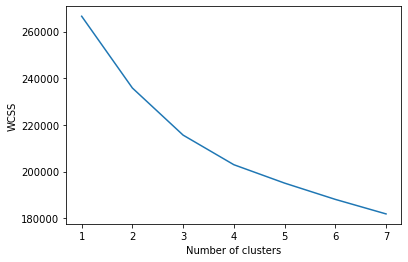

In [12]:
import matplotlib.pyplot as plt
dataset = pd.read_csv(r'C:\VIT TY\CV\Course Project\SIFT_Final.csv')
x=dataset.iloc[:, 0:32].values
from sklearn.cluster import KMeans #increase range 1-20
wcss = [] 
for i in range(1, 8): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5) #creating KMeans model instance with 5 clusters
kmeans.fit(data) #fitting the data(feature vector data) on the KMeans

KMeans(n_clusters=5)

In [14]:
import pickle

In [15]:
# save the model to disk
filename = 'K-Means_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [16]:
hist=np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5])

print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([401375, 255240, 561337, 253372, 547932], dtype=int64), array([0, 1, 2, 3, 4, 5])) 



In [17]:
#performing kmeans prediction of the entire exercise dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=0
data=[]
#k=0

for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(200, 200)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.SIFT_create()
    
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    norm = Normalizer()
    normalized = norm.fit_transform(descriptors)
    out=pd.DataFrame(normalized)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    #k=k+1
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('C:\VIT TY\CV\Course Project\FinalPosExer.csv', mode='a',header=False,index=False)

In [18]:
#performing kmeans prediction of the entire cooking dataset with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder2):
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    resize=(200, 200)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    norm = Normalizer()
    normalized = norm.fit_transform(descriptors)
    out=pd.DataFrame(normalized)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float' but got 'double', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    hist=np.histogram(a,bins=[0,1,2,3,4,5])
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    k=k+1
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data =Output.to_csv('C:\VIT TY\CV\Course Project\FinalPosCook.csv', mode='a',header=False,index=False)

In [19]:
#performing kmeans prediction of the entire NegImg dataset with the pretrained kmeans model

#initialising i=0; as its the first class
i=2
data=[]
k=0

for filename in os.listdir(folder3):
    #path
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(200, 200)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.SIFT_create()
    
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    norm = Normalizer()
    normalized = norm.fit_transform(descriptors)
    out=pd.DataFrame(normalized)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5])
    
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    k=k+1
    if k > 3549:
        break
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('C:\VIT TY\CV\Course Project\FinalNegImg.csv', mode='a',header=False,index=False)

In [20]:
#Displaying the kmeans predicted data
print("Exercise")
dat1 = pd.read_csv(r'C:\VIT TY\CV\Course Project\FinalPosExer.csv',header=None)
print(dat1)

Exercise
       0   1    2   3    4  5
0     34   9   33   7   34  0
1     33   0   20   8   10  0
2     82  73  219  91  214  0
3     39   3   45  16   15  0
4     27   0   24   7   18  0
...   ..  ..  ...  ..  ... ..
3545  22   0   10  10    6  0
3546  50   4   29  11   28  0
3547  47   3   42  13   26  0
3548  22   2   20  12    7  0
3549  29   2   19   3   16  0

[3550 rows x 6 columns]


In [21]:
print("Cooking")
dat2 = pd.read_csv(r'C:\VIT TY\CV\Course Project\FinalPosCook.csv',header=None)
print(dat2)

Cooking
        0   1    2   3    4  5
0      64  65  151  40  161  1
1      86  19   99  27   81  1
2      87  44  113  46  126  1
3     105  26   64  18   90  1
4      77  38   80  31   79  1
...   ...  ..  ...  ..  ... ..
1115   63  65  132  39  153  1
1116   96  35   94  27  103  1
1117  150  39  127  45  131  1
1118   55  12   47  29   32  1
1119   79  54   62  37   81  1

[1120 rows x 6 columns]


In [22]:
print("NegImg")
dat3= pd.read_csv(r'C:\VIT TY\CV\Course Project\FinalNegImg.csv',header=None)
print(dat3)

NegImg
       0   1    2   3    4  5
0     35  71  105  59   88  2
1      7  48   52  31   54  2
2     73  81  181  66  161  2
3     92  66  103  53  102  2
4     51  79  192  30  142  2
...   ..  ..  ...  ..  ... ..
3545  46  57   91  49  103  2
3546  71  66  130  31  136  2
3547  31  69  176  45  163  2
3548  28  45   74  29   54  2
3549  47  28   92  43   75  2

[3550 rows x 6 columns]


In [23]:
#appending All classes into 1 csv file

A=dat1.append(dat2)
A=A.append(dat3)
csv_data=A.to_csv('C:\VIT TY\CV\Course Project\FinalSDEC.csv', mode='a',header=False,index=False)

In [24]:
A

,0,1,2,3,4,5
0,34,9,33,7,34,0
1,33,0,20,8,10,0
2,82,73,219,91,214,0
3,39,3,45,16,15,0
4,27,0,24,7,18,0
...,...,...,...,...,...,...
3545,46,57,91,49,103,2
3546,71,66,130,31,136,2
3547,31,69,176,45,163,2
3548,28,45,74,29,54,2


In [25]:
x = A.iloc[:,0:5].values      #getting the first 5 values of dataframe A into x

In [26]:
x

array([[ 34,   9,  33,   7,  34],
       [ 33,   0,  20,   8,  10],
       [ 82,  73, 219,  91, 214],
       ...,
       [ 31,  69, 176,  45, 163],
       [ 28,  45,  74,  29,  54],
       [ 47,  28,  92,  43,  75]], dtype=int64)

In [27]:
y = A.iloc[:,5].values        #getting the last 6th column values in y as target variable
y

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [28]:
from sklearn.preprocessing import StandardScaler#importing standard scaler to standardize the x(cluster) values to a smaller range
scaler = StandardScaler()
x_transform = scaler.fit_transform(x)

In [29]:
x_transform

array([[-0.61201725, -0.68963699, -0.65945636, -0.94194389, -0.56794875],
       [-0.65328869, -0.97110751, -0.90239015, -0.90240602, -0.98532292],
       [ 1.36901173,  1.31193109,  2.81636564,  2.37923659,  2.5623575 ],
       ...,
       [-0.73583156,  1.18683308,  2.01281539,  0.5604949 ,  1.6754374 ],
       [-0.85964588,  0.43624505,  0.10671946, -0.07211091, -0.22013695],
       [-0.07548857, -0.09542147,  0.44308933,  0.48141917,  0.14506545]])

# Using PCA for dimensionality reduction

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None) #setting the components to None to generate min(n_samples, n_features) - 1 principal components from the input data
pca.fit(x_transform)

PCA()

In [31]:
xpca = pca.transform(x_transform)
xpca

array([[-1.54511599, -0.11396703, -0.24638242,  0.17588572,  0.05347044],
       [-1.99031176,  0.0199312 ,  0.03558733,  0.06905605, -0.03960326],
       [ 4.75412342, -0.03325582,  0.50189828,  0.94678473,  0.05114398],
       ...,
       [ 2.34519964, -1.5874285 , -0.45775871,  0.93066217, -0.16469954],
       [-0.17462221, -0.91915496, -0.0879018 , -0.19217393, -0.27267887],
       [ 0.43669946, -0.15376288,  0.40963501,  0.26894441, -0.09725718]])

In [32]:
xpca = pd.DataFrame(xpca)

In [33]:
xpca

,0,1,2,3,4
0,-1.545116,-0.113967,-0.246382,0.175886,0.053470
1,-1.990312,0.019931,0.035587,0.069056,-0.039603
2,4.754123,-0.033256,0.501898,0.946785,0.051144
3,-1.451889,0.120082,0.197170,0.203576,-0.267319
4,-1.986688,-0.233532,-0.006476,0.202274,0.024063
...,...,...,...,...,...
8215,1.173964,-0.558448,0.082294,-0.230857,0.134541
8216,1.952557,0.187791,-0.944463,0.257367,-0.100250
8217,2.345200,-1.587428,-0.457759,0.930662,-0.164700
8218,-0.174622,-0.919155,-0.087902,-0.192174,-0.272679


In [34]:
xpca.shape

(8220, 5)

In [35]:
print(pca.explained_variance_ratio_)                #getting the percentage of variance explained by components generated by pca

[0.7816066  0.13140162 0.04778116 0.02933024 0.00988038]


In [36]:
pca = PCA(n_components=4)                       #selecting the number of components to explain a 95% of variance
pca.fit(x_transform)

PCA(n_components=4)

In [37]:
# save the model to disk
filename = 'C:\VIT TY\CV\Course Project\PCA_4_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [38]:
xpca = pca.transform(x_transform)

In [39]:
xpca

array([[-1.54511599, -0.11396703, -0.24638242,  0.17588572],
       [-1.99031176,  0.0199312 ,  0.03558733,  0.06905605],
       [ 4.75412342, -0.03325582,  0.50189828,  0.94678473],
       ...,
       [ 2.34519964, -1.5874285 , -0.45775871,  0.93066217],
       [-0.17462221, -0.91915496, -0.0879018 , -0.19217393],
       [ 0.43669946, -0.15376288,  0.40963501,  0.26894441]])

In [40]:
print(pca.explained_variance_ratio_) 

[0.7816066  0.13140162 0.04778116 0.02933024]


In [41]:
xpca = pd.DataFrame(xpca)

In [42]:
xpca

,0,1,2,3
0,-1.545116,-0.113967,-0.246382,0.175886
1,-1.990312,0.019931,0.035587,0.069056
2,4.754123,-0.033256,0.501898,0.946785
3,-1.451889,0.120082,0.197170,0.203576
4,-1.986688,-0.233532,-0.006476,0.202274
...,...,...,...,...
8215,1.173964,-0.558448,0.082294,-0.230857
8216,1.952557,0.187791,-0.944463,0.257367
8217,2.345200,-1.587428,-0.457759,0.930662
8218,-0.174622,-0.919155,-0.087902,-0.192174


In [43]:
B=pd.concat([xpca, pd.DataFrame(y)],axis=1) #converting the transformed x by pca and y to dataframe and converting it to csv

In [44]:
B

,0,1,2,3,0
0,-1.545116,-0.113967,-0.246382,0.175886,0
1,-1.990312,0.019931,0.035587,0.069056,0
2,4.754123,-0.033256,0.501898,0.946785,0
3,-1.451889,0.120082,0.197170,0.203576,0
4,-1.986688,-0.233532,-0.006476,0.202274,0
...,...,...,...,...,...
8215,1.173964,-0.558448,0.082294,-0.230857,2
8216,1.952557,0.187791,-0.944463,0.257367,2
8217,2.345200,-1.587428,-0.457759,0.930662,2
8218,-0.174622,-0.919155,-0.087902,-0.192174,2


In [45]:
csv_data=B.to_csv(r'C:\VIT TY\CV\Course Project\PCAFinal.csv', mode='a',header=False,index=False)

In [46]:
data= pd.read_csv(r'C:\VIT TY\CV\Course Project\PCAFinal.csv',header=None)
data

,0,1,2,3,4
0,-1.545116,-0.113967,-0.246382,0.175886,0
1,-1.990312,0.019931,0.035587,0.069056,0
2,4.754123,-0.033256,0.501898,0.946785,0
3,-1.451889,0.120082,0.197170,0.203576,0
4,-1.986688,-0.233532,-0.006476,0.202274,0
...,...,...,...,...,...
8215,1.173964,-0.558448,0.082294,-0.230857,2
8216,1.952557,0.187791,-0.944463,0.257367,2
8217,2.345200,-1.587428,-0.457759,0.930662,2
8218,-0.174622,-0.919155,-0.087902,-0.192174,2


In [47]:
#assigning x the columns from 1 to 128 for training
x = data.iloc[:,0:4].values
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = data.iloc[:,4]
print("Y values")
print(y)

X values
[[-1.54511599 -0.11396703 -0.24638242  0.17588572]
 [-1.99031176  0.0199312   0.03558733  0.06905605]
 [ 4.75412342 -0.03325582  0.50189828  0.94678473]
 ...
 [ 2.34519964 -1.5874285  -0.45775871  0.93066217]
 [-0.17462221 -0.91915496 -0.0879018  -0.19217393]
 [ 0.43669946 -0.15376288  0.40963501  0.26894441]]
Y values
0       0
1       0
2       0
3       0
4       0
       ..
8215    2
8216    2
8217    2
8218    2
8219    2
Name: 4, Length: 8220, dtype: int64


# Dataset splitting for train and test purposes

In [48]:
#Dataset split into train and test with 80% Training and 20% Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

# SVM-ovr

### Linear kernel

In [49]:
#SVM Classifier
#Assign model with SVM classifier
model_SVMovr_k1 = SVC(kernel='linear',decision_function_shape='ovr')
filename = 'SVM Linear.sav'
pickle.dump(kmeans, open(filename, 'wb'))
#training the model with the Training Variables 
model_SVMovr_k1.fit(x_train, y_train)
#predicting the target variable using testing variables
y_predSVMovr_k1 = model_SVMovr_k1.predict(x_test)
#Results
print("SVM-ovr kernel1 Results")
print("Training accuracy: ", accuracy_score(y_train, model_SVMovr_k1.predict(x_train))*100,"%")
print("SVM-ovr kernel1 Accuracy: ",accuracy_score(y_test, y_predSVMovr_k1)*100,"%")

SVM-ovr kernel1 Results
Training accuracy:  78.68004866180048 %
SVM-ovr kernel1 Accuracy:  79.50121654501217 %


In [50]:
#confusion matrix
confusion_matrix(y_test, y_predSVMovr_k1)

array([[660,  11,  46],
       [ 53,  57, 107],
       [ 97,  23, 590]], dtype=int64)

#### Precision, Recall, F1-score

In [51]:
print("Precision: ", precision_score(y_test, y_predSVMovr_k1, average = 'macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_predSVMovr_k1, average = 'macro'))
#tn, fp, fn, tp = confusion_matrix(y_test, y_predSVMovr_k1).ravel()
#specificity = tn / (tn+fp)
#print("Specificity: ", specificity)
print("F1-score: ",f1_score(y_test, y_predSVMovr_k1, average = 'macro'))

Precision:  0.7450888343665373
Recall/Sensitivity:  0.6713869395343582
F1-score:  0.6822276062132087


### Polynomial kernel

In [52]:
#SVM Classifier
#Assign model with SVM classifier
model_SVMovr_k2 = SVC(kernel='poly',decision_function_shape='ovr')
filename = 'SVM Poly.sav'
pickle.dump(kmeans, open(filename, 'wb'))
#training the model with the Training Variables 
model_SVMovr_k2.fit(x_train, y_train)
#predicting the target variable using testing variables
y_predSVMovr_k2 = model_SVMovr_k2.predict(x_test)
#Results
print("SVM-ovr kernel2 Results")
print("Training accuracy: ", accuracy_score(y_train, model_SVMovr_k2.predict(x_train))*100,"%")
print("SVM-ovr kernel2 Accuracy: ",accuracy_score(y_test, y_predSVMovr_k2)*100,"%")

SVM-ovr kernel2 Results
Training accuracy:  76.58150851581509 %
SVM-ovr kernel2 Accuracy:  77.98053527980535 %


In [53]:
#confusion matrix
confusion_matrix(y_test, y_predSVMovr_k2)

array([[603,   5, 109],
       [ 34,  37, 146],
       [ 57,  11, 642]], dtype=int64)

#### Precision, Recall, F1-score

In [54]:
print("Precision: ", precision_score(y_test, y_predSVMovr_k2, average = 'macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_predSVMovr_k2, average = 'macro'))
#tn, fp, fn, tp = confusion_matrix(y_test, y_predSVMovr_k2).ravel()
#specificity = tn / (tn+fp)
#print("Specificity: ", specificity)
print("F1-score: ",f1_score(y_test, y_predSVMovr_k2, average = 'macro'))

Precision:  0.7609027839279876
Recall/Sensitivity:  0.638578816218497
F1-score:  0.6425971331806614


### RBF kernel

In [55]:
#SVM Classifier
#Assign model with SVM classifier
model_SVMovr_k3 = SVC(kernel='rbf',decision_function_shape='ovr')
filename = 'SVM RBF.sav'
pickle.dump(kmeans, open(filename, 'wb'))
#training the model with the Training Variables 
model_SVMovr_k3.fit(x_train, y_train)
#predicting the target variable using testing variables
y_predSVMovr_k3 = model_SVMovr_k3.predict(x_test)
#Results
print("SVM-ovr kernel3 Results")
print("Training accuracy: ", accuracy_score(y_train, model_SVMovr_k3.predict(x_train))*100,"%")
print("SVM-ovr kernel3 Accuracy: ",accuracy_score(y_test, y_predSVMovr_k3)*100,"%")

SVM-ovr kernel3 Results
Training accuracy:  79.80535279805353 %
SVM-ovr kernel3 Accuracy:  80.17031630170315 %


In [56]:
#confusion matrix
confusion_matrix(y_test, y_predSVMovr_k3)

array([[666,  14,  37],
       [ 57,  62,  98],
       [ 98,  22, 590]], dtype=int64)

#### Precision, Recall, F1-score

In [57]:
print("Precision: ", precision_score(y_test, y_predSVMovr_k3, average = 'macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_predSVMovr_k3, average = 'macro'))
#tn, fp, fn, tp = confusion_matrix(y_test, y_predSVMovr_k3).ravel()
#specificity = tn / (tn+fp)
#print("Specificity: ", specificity)
print("F1-score: ",f1_score(y_test, y_predSVMovr_k3, average = 'macro'))

Precision:  0.7525506704004631
Recall/Sensitivity:  0.6818568313647576
F1-score:  0.694003421054707


# SVM-ovo

### Linear kernel

In [58]:
#SVM Classifier
#Assign model with SVM classifier
model_SVMovo_k1 = SVC(kernel='linear',decision_function_shape='ovo')
filename = 'SVM OVO.sav'
pickle.dump(kmeans, open(filename, 'wb'))
#training the model with the Training Variables 
model_SVMovo_k1.fit(x_train, y_train)
#predicting the target variable using testing variables
y_predSVMovo_k1 = model_SVMovo_k1.predict(x_test)
#Results
print("SVM-ovo kernel1 Results")
print("Training accuracy: ", accuracy_score(y_train, model_SVMovo_k1.predict(x_train))*100,"%")
print("SVM-ovo kernel1 Accuracy: ",accuracy_score(y_test, y_predSVMovo_k1)*100,"%")

SVM-ovo kernel1 Results
Training accuracy:  78.68004866180048 %
SVM-ovo kernel1 Accuracy:  79.50121654501217 %


In [59]:
#confusion matrix
confusion_matrix(y_test, y_predSVMovo_k1)

array([[660,  11,  46],
       [ 53,  57, 107],
       [ 97,  23, 590]], dtype=int64)

#### Precision, Recall, F1-score

In [60]:
print("Precision: ", precision_score(y_test, y_predSVMovo_k1, average = 'macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_predSVMovo_k1, average = 'macro'))
#tn, fp, fn, tp = confusion_matrix(y_test, y_predSVMovo_k1).ravel()
#specificity = tn / (tn+fp)
#print("Specificity: ", specificity)
print("F1-score: ",f1_score(y_test, y_predSVMovo_k1, average = 'macro'))

Precision:  0.7450888343665373
Recall/Sensitivity:  0.6713869395343582
F1-score:  0.6822276062132087


### Polnomial kernel

In [61]:
#SVM Classifier
#Assign model with SVM classifier
model_SVMovo_k2 = SVC(kernel='poly',decision_function_shape='ovo')
filename = 'SVM Polnomial.sav'
pickle.dump(kmeans, open(filename, 'wb'))
#training the model with the Training Variables 
model_SVMovo_k2.fit(x_train, y_train)
#predicting the target variable using testing variables
y_predSVMovo_k2 = model_SVMovo_k2.predict(x_test)
#Results
print("SVM-ovo kernel2 Results")
print("Training accuracy: ", accuracy_score(y_train, model_SVMovo_k2.predict(x_train))*100,"%")
print("SVM-ovo kernel2 Accuracy: ",accuracy_score(y_test, y_predSVMovo_k2)*100,"%")

SVM-ovo kernel2 Results
Training accuracy:  76.58150851581509 %
SVM-ovo kernel2 Accuracy:  77.98053527980535 %


In [62]:
#confusion matrix
confusion_matrix(y_test, y_predSVMovo_k2)

array([[603,   5, 109],
       [ 34,  37, 146],
       [ 57,  11, 642]], dtype=int64)

#### Precision, Recall, F1-score

In [63]:
print("Precision: ", precision_score(y_test, y_predSVMovo_k2, average = 'macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_predSVMovo_k2, average = 'macro'))
#tn, fp, fn, tp = confusion_matrix(y_test, y_predSVMovo_k2).ravel()
#specificity = tn / (tn+fp)
#print("Specificity: ", specificity)
print("F1-score: ",f1_score(y_test, y_predSVMovo_k2, average = 'macro'))

Precision:  0.7609027839279876
Recall/Sensitivity:  0.638578816218497
F1-score:  0.6425971331806614


### RBF kernel

In [64]:
#SVM Classifier
#Assign model with SVM classifier
model_SVMovo_k3 = SVC(kernel='rbf',decision_function_shape='ovo')
filename = 'RBF.sav'
pickle.dump(kmeans, open(filename, 'wb'))
#training the model with the Training Variables 
model_SVMovo_k3.fit(x_train, y_train)
#predicting the target variable using testing variables
y_predSVMovo_k3 = model_SVMovo_k3.predict(x_test)
#Results
print("SVM-ovo kernel3 Results")
print("Training accuracy: ", accuracy_score(y_train, model_SVMovo_k3.predict(x_train))*100,"%")
print("SVM-ovo kernel3 Accuracy: ",accuracy_score(y_test, y_predSVMovo_k3)*100,"%")

SVM-ovo kernel3 Results
Training accuracy:  79.80535279805353 %
SVM-ovo kernel3 Accuracy:  80.17031630170315 %


In [65]:
#confusion matrix
confusion_matrix(y_test, y_predSVMovo_k3)

array([[666,  14,  37],
       [ 57,  62,  98],
       [ 98,  22, 590]], dtype=int64)

#### Precision, Recall, F1-score

In [66]:
print("Precision: ", precision_score(y_test, y_predSVMovo_k3, average = 'macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_predSVMovo_k3, average = 'macro'))
#tn, fp, fn, tp = confusion_matrix(y_test, y_predSVMovo_k3).ravel()
#specificity = tn / (tn+fp)
#print("Specificity: ", specificity)
print("F1-score: ",f1_score(y_test, y_predSVMovo_k3, average = 'macro'))

Precision:  0.7525506704004631
Recall/Sensitivity:  0.6818568313647576
F1-score:  0.694003421054707


# KNN

In [67]:
#KNN Classifier
#Assign model with KNN classifier
model_KNN = KNeighborsClassifier()
filename = 'K-NN.sav'
pickle.dump(kmeans, open(filename, 'wb'))
#training the model with the Training Variables 
model_KNN.fit(x_train, y_train)
#predicting the target variable using testing variables
y_predKNN = model_KNN.predict(x_test)
#Results
print("KNN Results")
print("Training accuracy: ", accuracy_score(y_train, model_KNN.predict(x_train))*100,"%")
print("KNN Accuracy: ",accuracy_score(y_test, y_predKNN)*100,"%")

KNN Results
Training accuracy:  84.48905109489051 %
KNN Accuracy:  79.31873479318735 %


In [68]:
#confusion matrix
confusion_matrix(y_test, y_predKNN)

array([[645,  25,  47],
       [ 59,  86,  72],
       [ 85,  52, 573]], dtype=int64)

#### Precision, Recall, F1-score

In [69]:
print("Precision: ", precision_score(y_test, y_predKNN, average = 'macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_predKNN, average = 'macro'))
#tn, fp, fn, tp = confusion_matrix(y_test, y_predKNN).ravel()
#specificity = tn / (tn+fp)
#print("Specificity: ", specificity)
print("F1-score: ",f1_score(y_test, y_predKNN, average = 'macro'))

Precision:  0.7243775127802309
Recall/Sensitivity:  0.7009790691781951
F1-score:  0.7088696643712709


# Decision Tree

In [70]:
#Decision Tree Classifier
#Assign model with Decision Tree classifier
model_DT = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=4)
filename = 'DT.sav'
pickle.dump(kmeans, open(filename, 'wb'))
#training the model with the Training Variables 
model_DT.fit(x_train, y_train)
#predicting the target variable using testing variables
y_predDT = model_DT.predict(x_test)
#Results
print("Decision Tree Results")
print("Training accuracy: ", accuracy_score(y_train, model_DT.predict(x_train))*100,"%")
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_predDT)*100,"%")

Decision Tree Results
Training accuracy:  75.7147201946472 %
Decision Tree Accuracy:  75.91240875912408 %


In [71]:
#confusion matrix
confusion_matrix(y_test, y_predDT)

array([[646,   0,  71],
       [ 42,   0, 175],
       [108,   0, 602]], dtype=int64)

#### Precision, Recall, F1-score

In [72]:
print("Precision: ", precision_score(y_test, y_predDT, average = 'macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_predDT, average = 'macro'))
#tn, fp, fn, tp = confusion_matrix(y_test, y_predDT).ravel()
#specificity = tn / (tn+fp)
#print("Specificity: ", specificity)
print("F1-score: ",f1_score(y_test, y_predDT, average = 'macro'))

Precision:  0.5071544831073607
Recall/Sensitivity:  0.5829545380137636
F1-score:  0.542239402287577


C:\Users\mahes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [73]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#Assign model with Decision Tree classifier
model_RF = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=None, min_samples_split=4,
                                min_samples_leaf=3, min_weight_fraction_leaf=0.0, max_features='auto',
                                max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                n_jobs=None, random_state=2, verbose=0, warm_start=False, class_weight=None, 
                                ccp_alpha=0.0, max_samples=None)
filename = 'RF.sav'
pickle.dump(kmeans, open(filename, 'wb'))
#training the model with the Training Variables 
model_RF.fit(x_train, y_train)
#predicting the traget variable using testing variables
y_predRF = model_RF.predict(x_test)
#Results
print("RandomF Results")
print("Training accuracy: ", accuracy_score(y_train, model_RF.predict(x_train))*100,"%")
print("RandomF Accuracy: ",accuracy_score(y_test, y_predRF)*100,"%")

RandomF Results
Training accuracy:  92.92883211678831 %
RandomF Accuracy:  80.83941605839416 %


In [74]:
#confusion matrix
confusion_matrix(y_test, y_predRF)

array([[652,  17,  48],
       [ 40,  89,  88],
       [ 81,  41, 588]], dtype=int64)

#### Precision, Recall, F1-score

In [75]:
print("Precision: ", precision_score(y_test, y_predRF, average = 'macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_predRF, average = 'macro'))
#tn, fp, fn, tp = confusion_matrix(y_test, y_predRF).ravel()
#specificity = tn / (tn+fp)
#print("Specificity: ", specificity)
print("F1-score: ",f1_score(y_test, y_predRF, average = 'macro'))

Precision:  0.7536879615487649
Recall/Sensitivity:  0.7158839179556274
F1-score:  0.7280874854180855


# Logistic Regression 

In [76]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
filename = 'LR.sav'
pickle.dump(kmeans, open(filename, 'wb'))
#training the model with the Training Variables 
model_LR.fit(x_train, y_train)
#predicting the traget variable using testing variables
y_predLR = model_LR.predict(x_test)
#Results
print("Logistic Regression Results")
print("Training accuracy: ", accuracy_score(y_train, model_LR.predict(x_train))*100,"%")
print("Logistic Regression Accuracy: ",accuracy_score(y_test, y_predLR)*100,"%")

Logistic Regression Results
Training accuracy:  78.90815085158151 %
Logistic Regression Accuracy:  79.68369829683698 %


In [77]:
#confusion matrix
confusion_matrix(y_test, y_predLR)

array([[661,  14,  42],
       [ 50,  67, 100],
       [ 96,  32, 582]], dtype=int64)

#### Precision, Recall, F1-score

In [78]:
print("Precision: ", precision_score(y_test, y_predLR, average = 'macro'))
print("Recall/Sensitivity: ",recall_score(y_test, y_predLR, average = 'macro'))
#tn, fp, fn, tp = confusion_matrix(y_test, y_predRF).ravel()
#specificity = tn / (tn+fp)
#print("Specificity: ", specificity)
print("F1-score: ",f1_score(y_test, y_predLR, average = 'macro'))

Precision:  0.7386235936137361
Recall/Sensitivity:  0.6834569541391659
F1-score:  0.695076718491208


# Prediction

### Single Image

In [79]:
test = []
path = r"C:\VIT TY\\CV\\Course Project\\PosCook\\1 (19).jpg"

#Repeated the process of image pre-processing and feature extraction
img=cv2.imread(path)
resize=(200, 200)

#resize image
img=cv2.resize(img,resize)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#initialise sift descriptor
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray, None)
norm = Normalizer()
normalized = norm.fit_transform(descriptors)
#convert the descriptor array into a dataframe format
out=pd.DataFrame(normalized)
print("descriptor shape ",i," : ", out.shape)

#train the model for the features i.e. for all elements in the Dataframe
array_double = np.array(out, dtype=np.double)
a = kmeans.predict(array_double)

#get the values of the histogram for one image only for 5 clusters i.e. in 5 bins
#kmeans.labels_ give us the label vlaue of the feature that its clustered into
#hist will give the histogram for all those vlaues
hist = np.histogram(a,bins=[0,1,2,3,4,5])

#append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
test.append(hist[0])

Output = pd.DataFrame(test)
print("Histogram:\n",Output)
Output_trans = scaler.transform(Output)
print(Output_trans.shape, Output_trans)
pcaOutput = pca.transform(Output_trans)
print(pcaOutput.shape, pcaOutput)
print(model_SVMovr_k1.predict(pcaOutput))
print(model_SVMovr_k2.predict(pcaOutput))
print(model_SVMovr_k3.predict(pcaOutput))
print(model_SVMovo_k1.predict(pcaOutput))
print(model_SVMovo_k2.predict(pcaOutput))
print(model_SVMovo_k3.predict(pcaOutput))
print(model_KNN.predict(pcaOutput))
print(model_DT.predict(pcaOutput))
print(model_RF.predict(pcaOutput))
#print(model_LR.predict(pcaOutput))

descriptor shape  2  :  (500, 128)
Histogram:
      0   1   2   3    4
0  131  42  99  82  146
(1, 5) [[3.39131214 0.34242155 0.57389983 2.02339583 1.37979736]]
(1, 4) [[ 3.15784577  2.63174625  0.7457619  -0.28966161]]
[1]
[2]
[1]
[1]
[2]
[1]
[2]
[2]
[1]


# Multiple Image Prediction

In [80]:
foldertest = r"C:\VIT TY\\CV\\Course Project\\Test"
i=0
test = []
for filename in os.listdir(foldertest):
    #path
    path=os.path.join(foldertest,filename)
    img=cv2.imread(path)
    resize=(200, 200)

    #resize image
    img=cv2.resize(img,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #initialise sift descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    norm = Normalizer()
    normalized = norm.fit_transform(descriptors)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(normalized)
    print("descriptor shape ",i," : ", out.shape)

    #train the model for the features i.e. for all elements in the Dataframe
    array_double = np.array(out, dtype=np.double)
    a = kmeans.predict(array_double)

    #get the values of the histogram for one image only for 5 clusters i.e. in 5 bins
    #kmeans.labels_ give us the label vlaue of the feature that its clustered into
    #hist will give the histogram for all those vlaues
    hist = np.histogram(a,bins=[0,1,2,3,4,5])

    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    test.append(hist[0])
    i=i+1

Output = pd.DataFrame(test)
#print("Histogram:\n",Output)
Output_trans = scaler.transform(Output)
#print(Output_trans.shape, Output_trans)
pcaOutput = pca.transform(Output_trans)
#print(pcaOutput.shape, pcaOutput)
model_RF.predict(pcaOutput)

descriptor shape  0  :  (481, 128)
descriptor shape  1  :  (312, 128)
descriptor shape  2  :  (416, 128)
descriptor shape  3  :  (416, 128)
descriptor shape  4  :  (269, 128)
descriptor shape  5  :  (434, 128)
descriptor shape  6  :  (333, 128)
descriptor shape  7  :  (320, 128)
descriptor shape  8  :  (308, 128)
descriptor shape  9  :  (149, 128)
descriptor shape  10  :  (329, 128)
descriptor shape  11  :  (542, 128)
descriptor shape  12  :  (251, 128)
descriptor shape  13  :  (473, 128)
descriptor shape  14  :  (276, 128)
descriptor shape  15  :  (275, 128)
descriptor shape  16  :  (278, 128)
descriptor shape  17  :  (402, 128)
descriptor shape  18  :  (291, 128)
descriptor shape  19  :  (257, 128)
descriptor shape  20  :  (87, 128)
descriptor shape  21  :  (146, 128)
descriptor shape  22  :  (498, 128)
descriptor shape  23  :  (220, 128)
descriptor shape  24  :  (400, 128)
descriptor shape  25  :  (275, 128)
descriptor shape  26  :  (181, 128)
descriptor shape  27  :  (193, 128)
des

array([2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 0, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,